In [326]:
pip install mlxtend  


In [327]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.linear_model import LinearRegression
from mlxtend.evaluate import bias_variance_decomp
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures



In [328]:
data = pd.read_pickle(r'C:/Users/Flutter/Desktop/lab3/Q1_data/data.pkl')

In [329]:
data

array([[ 0.00000000e+00,  2.00000000e+00],
       [ 1.00000000e-03,  2.02599961e+00],
       [ 2.00000000e-03,  2.05199691e+00],
       ...,
       [ 4.99700000e+00, -2.19781538e+01],
       [ 4.99800000e+00, -2.19609488e+01],
       [ 4.99900000e+00, -2.19436572e+01]])

In [330]:
X_train, X_test, y_train, y_test = train_test_split(data[:,:-1], data[:,-1], test_size=0.1,shuffle=True ,random_state=1)
print(len(X_train))
X_train.shape

4500


(4500, 1)

In [331]:
new_X_Train=np.array_split(X_train, 10)
new_Y_Train=np.array_split(y_train, 10)

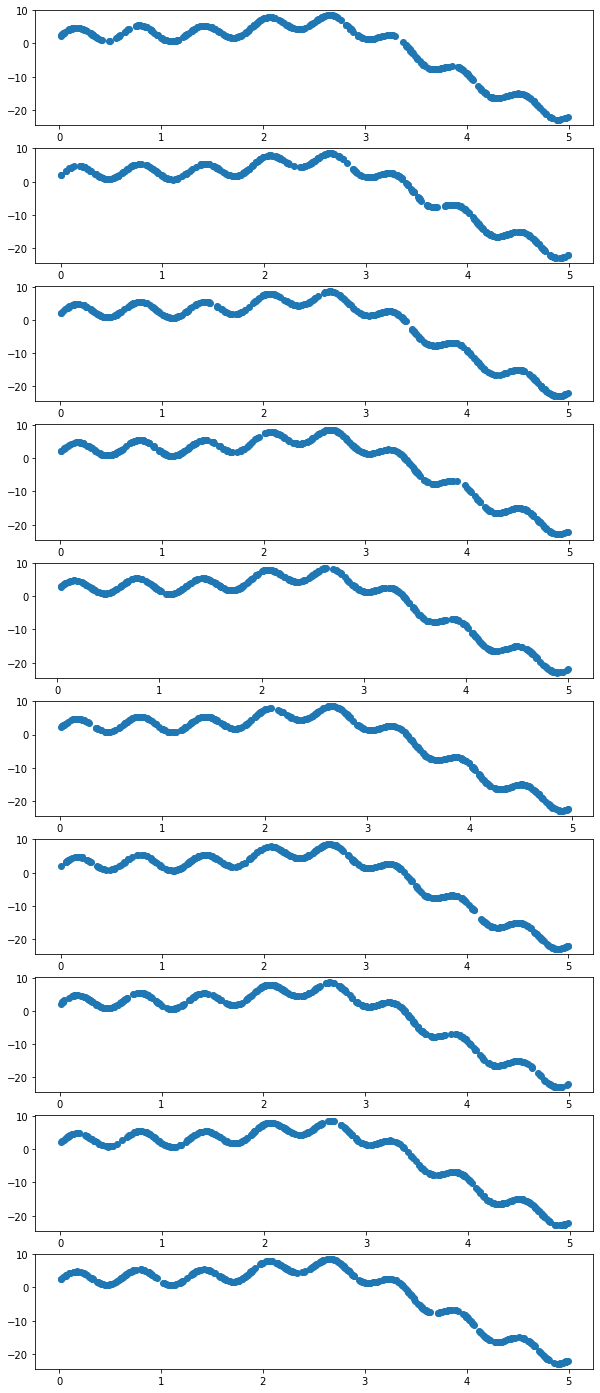

In [332]:
fig, ax = plt.subplots(10, figsize = (10, 25))
for i in range(10):
    ax[i].scatter(new_X_Train[i], new_Y_Train[i])

model number 1
av_mse= 30.664000887501675
av_bias= 30.516779825696915
av_Variance= 0.14722106180476507


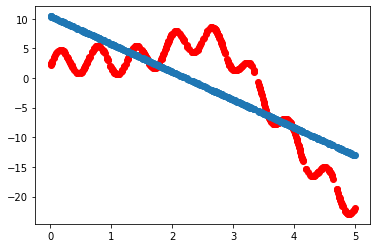

************next_model***********
model number 2
av_mse= 6.4036906956839275
av_bias= 6.36379899049592
av_Variance= 0.03989170518800772


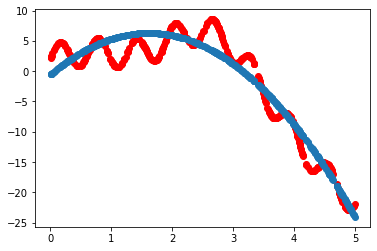

************next_model***********
model number 3
av_mse= 5.543162428846305
av_bias= 5.4963252477698035
av_Variance= 0.0468371810765006


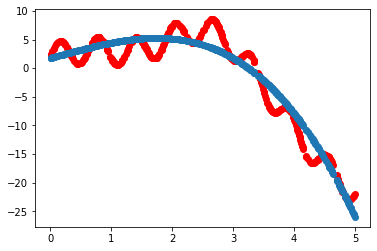

************next_model***********
model number 4
av_mse= 3.4012966613074127
av_bias= 3.3679306806383673
av_Variance= 0.033365980669045774


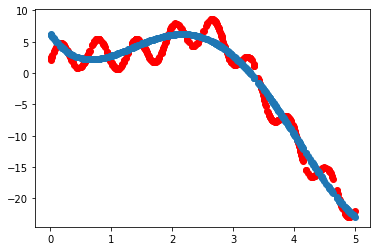

************next_model***********
model number 5
av_mse= 3.1970027068121354
av_bias= 3.1573258072600443
av_Variance= 0.03967689955209132


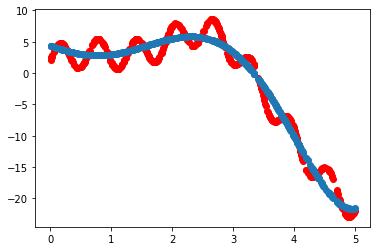

************next_model***********
model number 6
av_mse= 2.698891227792168
av_bias= 2.6622042485930617
av_Variance= 0.03668697919910702


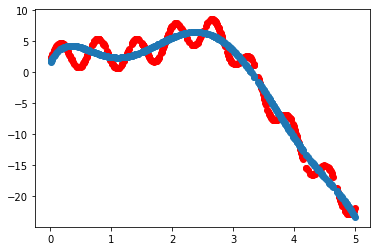

************next_model***********
model number 7
av_mse= 2.616127973495886
av_bias= 2.570796664945914
av_Variance= 0.045331308549973075


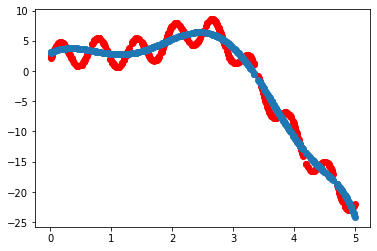

************next_model***********
model number 8
av_mse= 2.5772314302727324
av_bias= 2.5232797409606977
av_Variance= 0.053951689312034604


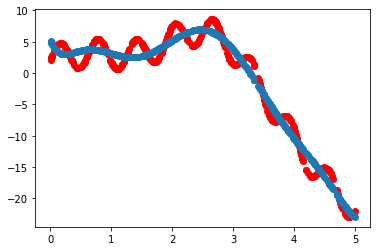

************next_model***********
model number 9
av_mse= 2.57094157094434
av_bias= 2.508912658248712
av_Variance= 0.062028912695628456


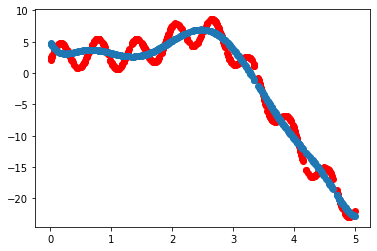

************next_model***********


In [333]:
#model = LinearRegression()
MeanMseList=[]
MeanVarianceList=[]
MeanBiasList=[]

for r in range (1,10):
     sum_mse=0
     sum_bias=0
     sum_var=0
     #
     results=[]
     print('model number',r)
     poly = PolynomialFeatures(degree=r, include_bias=True)
     poly_featuresTest = poly.fit_transform(np.array(X_test).reshape(-1,1))
     for e in range (10):
         poly_featuresX = poly.fit_transform(np.array(new_X_Train[e]).reshape(-1,1))
         poly_reg_model = LinearRegression().fit(poly_featuresX,new_Y_Train[e])
         mse, bias, var = bias_variance_decomp(poly_reg_model, poly_featuresX, new_Y_Train[e], poly_featuresTest, y_test, loss='mse', num_rounds=200, random_seed=1) 
         results.append([mse, bias, var])
        
     #avmse=sum(results[:][:,0])
     #print(avmse)
     for i in range(len(results)):
        sum_mse+=results[i][0]# mse
        sum_bias+=results[i][1]# bias
        sum_var+=results[i][2]# var
        ####
        sizeTotal=len(results)
        avg_Mse=sum_mse/sizeTotal
        avg_Bias=sum_bias/sizeTotal
        avg_Var=sum_var/sizeTotal
     print('av_mse=',avg_Mse)
     print('av_bias=',avg_Bias)
     print('av_Variance=',avg_Var)
     MeanMseList.append(avg_Mse) 
     MeanVarianceList.append( avg_Var)
     MeanBiasList.append(avg_Bias)
     y_pred = poly_reg_model.predict( poly_featuresTest )
     plt.scatter( X_test,y_test,color = 'red')
     plt.scatter (X_test,y_pred)
     plt.show()
     
  
     #print(results)   
     print("************next_model***********")

In [334]:
# here we get the min index from the minim mean 
# take list and return list  
def minIndex(list):
  minValue = min(list)
  indexOfMin = [i for i, v in enumerate(list) if v == minValue]
  #print(indexOfMinMean[0])
  return indexOfMin

In [335]:
print( "min_mse_is_model_number" ,minIndex(MeanMseList)[0]+1,"with min_mse_of",min(MeanMseList))
print( "min_variance_is_model_number" ,minIndex(MeanVarianceList)[0]+1,"with min_variance_of",min(MeanVarianceList))
print( "min_bias_is_model_number" ,minIndex(MeanBiasList)[0]+1,"with min_bias_of",min(MeanBiasList))

min_mse_is_model_number 9 with min_mse_of 2.57094157094434
min_variance_is_model_number 4 with min_variance_of 0.033365980669045774
min_bias_is_model_number 9 with min_bias_of 2.508912658248712


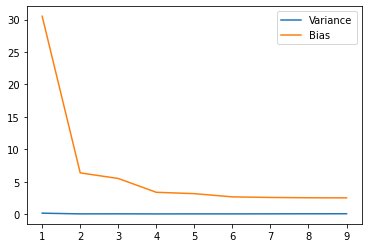

In [336]:
# let's graph the trade off between Variance and bias
degrees=[1,2,3,4,5,6,7,8,9]
plt.plot(degrees,MeanVarianceList,label="Variance")
plt.plot(degrees,MeanBiasList,label="Bias")
#plt.plot(degrees,MeanMseList,label="MSE")

plt.legend()



In [337]:
###################################### << Question 2 >> #################################################

In [338]:
Fx_test4=pd.read_pickle(r'C:/Users/Flutter/Desktop/lab3/Q2_data/Fx_test.pkl')
Fx_test4.shape

(80,)

In [339]:
X_test3=pd.read_pickle(r'C:/Users/Flutter/Desktop/lab3/Q2_data/X_test.pkl')
X_test3.shape

(80,)

In [340]:
X_train1=pd.read_pickle(r'C:/Users/Flutter/Desktop/lab3/Q2_data/X_train.pkl')
X_train1.shape

(20, 400)

In [341]:
Y_train2=pd.read_pickle(r'C:/Users/Flutter/Desktop/lab3/Q2_data/Y_train.pkl')
Y_train2.shape

(20, 400)

model number 1
av_mse= 11584157.69852929
av_bias= 921023096.748936
av_Variance= 71368.98916759016


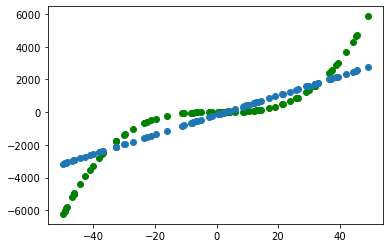

***********************
model number 2
av_mse= 11747077.332140947
av_bias= 930133973.2057106
av_Variance= 120402.66706956422


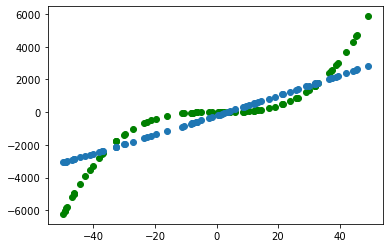

***********************
model number 3
av_mse= 13884479.883621002
av_bias= 1099022158.8687
av_Variance= 146702.89776225365


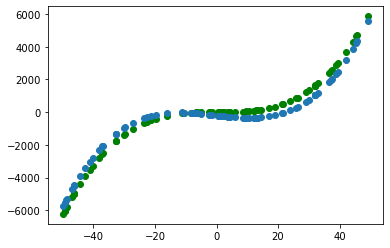

***********************
model number 4
av_mse= 14000343.141789645
av_bias= 1104638475.2989173
av_Variance= 192362.20055318653


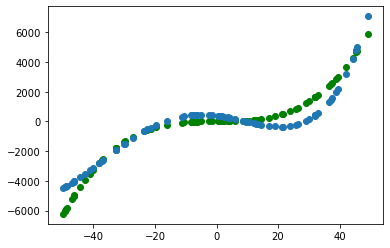

***********************
model number 5
av_mse= 14070374.298505077
av_bias= 1106734275.2222114
av_Variance= 236195.85822743754


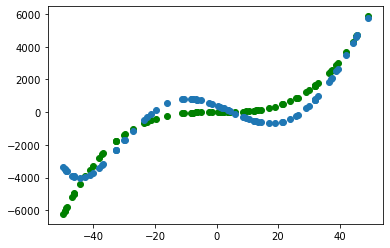

***********************
model number 6
av_mse= 14197953.968421683
av_bias= 1113312916.429193
av_Variance= 281542.51305676904


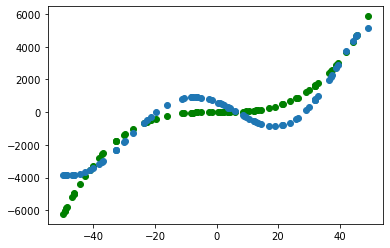

***********************
model number 7
av_mse= 14205124.233967785
av_bias= 1109836770.5631804
av_Variance= 332164.6019280291


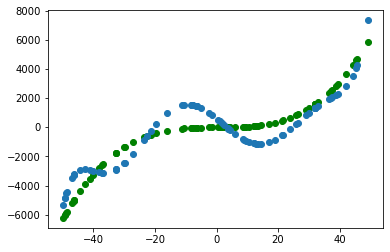

***********************
model number 8
av_mse= 14300344.202340554
av_bias= 1113195842.1466084
av_Variance= 385396.1755079482


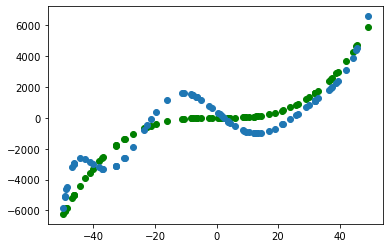

***********************
model number 9
av_mse= 14414705.05055983
av_bias= 1117234051.2560964
av_Variance= 449279.4098586283


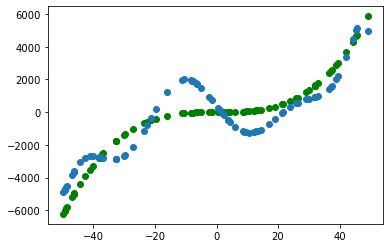

***********************


In [347]:
#model = LinearRegression()
MeanMseList=[]
MeanBiasList=[]
MeanVarianceList=[]
####
for r in range (1,10):
     sum_mse=0
     sum_var=0
     sum_bias=0
     #
     results=[]
     print('model number',r)
     poly = PolynomialFeatures(degree=r, include_bias=True)
     poly_featuresTest = poly.fit_transform(np.array(X_test3).reshape(-1,1))
     for e in range (20):
         poly_featuresX = poly.fit_transform(np.array(X_train1[e]).reshape(-1,1))
         poly_reg_model = LinearRegression().fit(poly_featuresX,Y_train2[e])
         mse, bias, var = bias_variance_decomp(poly_reg_model, poly_featuresX, Y_train2[e], poly_featuresTest, np.array(Fx_test).reshape(-1,1), loss='mse',random_seed=1) 
         results.append([mse, bias, var])
     y_pred = poly_reg_model.predict( poly_featuresTest )  
     #avmse=sum(results[:][:,0])
     #print(avmse)
     for i in range(len(results)):
        sum_mse+=results[i][0]# mse
        sum_bias+=results[i][1]# bias
        sum_var+=results[i][2]# var
        ####
        sizeTotal=len(results)
        avg_Mse=sum_mse/sizeTotal
        avg_Bias=sum_bias/sizeTotal
        avg_Var=sum_var/sizeTotal
     print('av_mse=',avg_Mse)
     print('av_bias=',avg_Bias)
     print('av_Variance=',avg_Var)
     MeanMseList.append(avg_Mse) 
     MeanVarianceList.append( avg_Var)
     MeanBiasList.append(avg_Bias)
        ####
     plt.scatter( X_test3,Fx_test4,color = 'green')
     plt.scatter(X_test3,y_pred)
     plt.show()   
     
  
     
  
     #print(results)   
     print("***********************")

In [343]:
print( "min_mse_is_model_number" ,minIndex(MeanMseList)[0]+1,"with min_mse_of",min(MeanMseList))
print( "min_variance_is_model_number" ,minIndex(MeanVarianceList)[0]+1,"with min_variance_of",min(MeanVarianceList))
print( "min_bias_is_model_number" ,minIndex(MeanBiasList)[0]+1,"with min_bias_of",min(MeanBiasList))

min_mse_is_model_number 1 with min_mse_of 11584157.69852929
min_variance_is_model_number 1 with min_variance_of 71368.98916759016
min_bias_is_model_number 1 with min_bias_of 921023096.748936


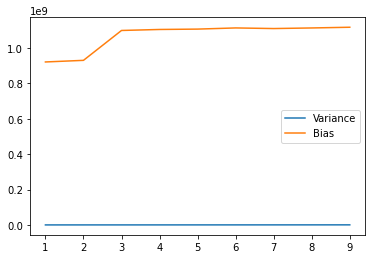

In [344]:
# let's graph the trade off between Variance and bias
plt.plot(degrees,MeanVarianceList,label="Variance")
plt.plot(degrees,MeanBiasList,label="Bias")
#plt.plot(degrees,MeanMseList,label="MSE")

plt.legend()



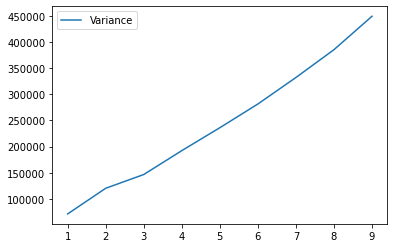

In [345]:
# let's graph the trade off between Variance 
plt.plot(degrees,MeanVarianceList,label="Variance")
#plt.plot(degrees,MeanMseList,label="MSE")

plt.legend()



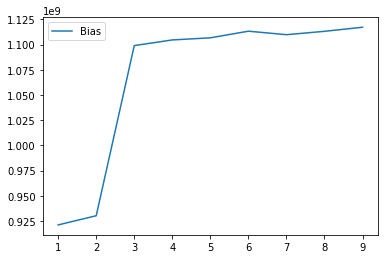

In [346]:
# let's graph the bias
plt.plot(degrees,MeanBiasList,label="Bias")

plt.legend()

